In [74]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [75]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


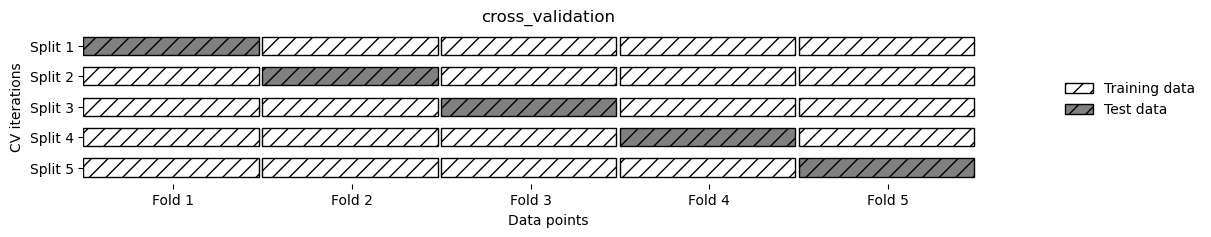

In [76]:
import mglearn

mglearn.plots.plot_cross_validation()

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# cv: number of folds
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [79]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [80]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


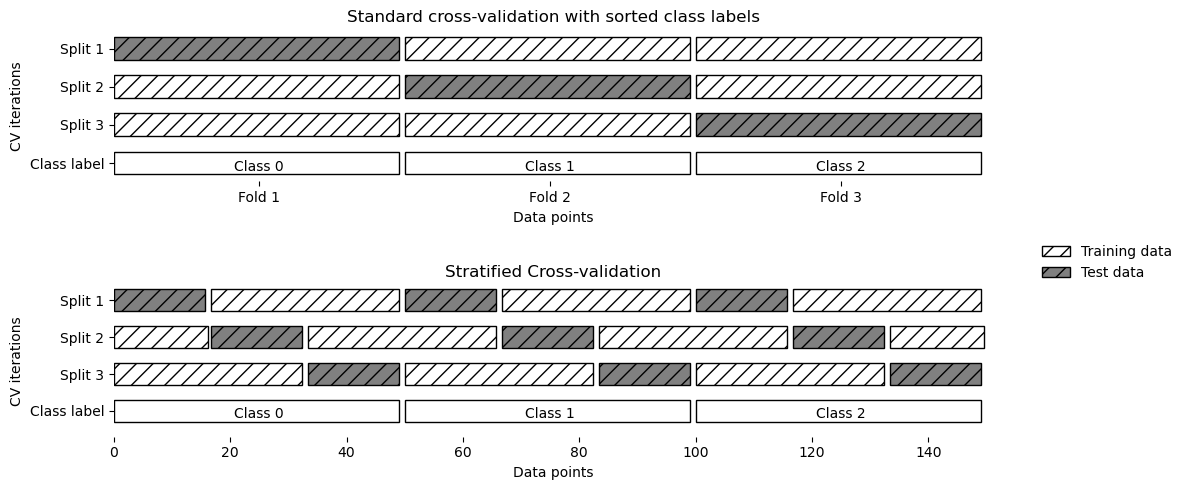

In [81]:
mglearn.plots.plot_stratified_cross_validation()

n_samples_per_fold:  50.0
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]


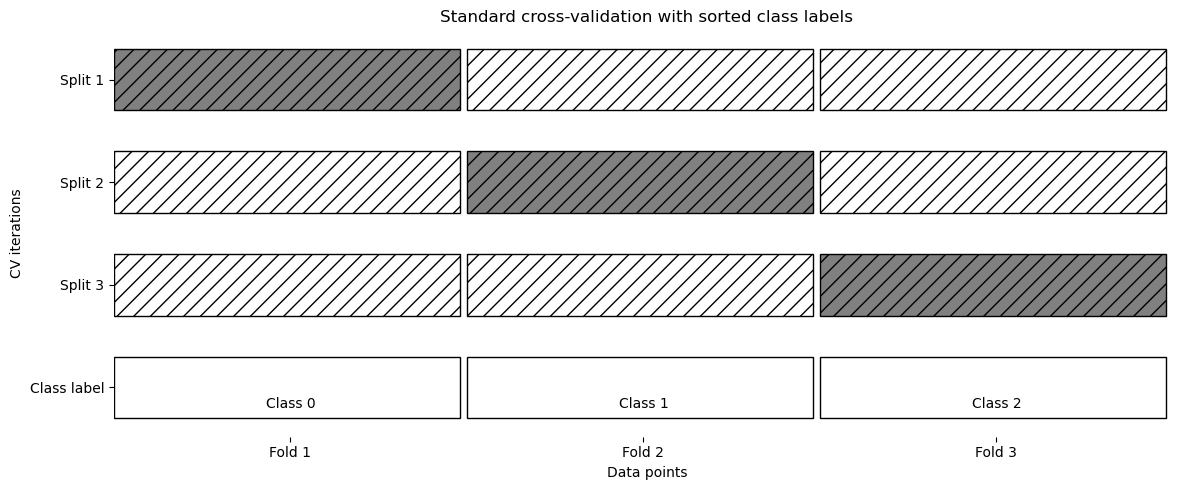

In [82]:
import matplotlib.pyplot as plt
import numpy as np

fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
axes = both_axes
axes.set_title("Standard cross-validation with sorted class labels")

axes.set_frame_on(False)

n_folds = 3
n_samples = 150

n_samples_per_fold = n_samples / float(n_folds)

print("n_samples_per_fold: ", n_samples_per_fold)
for i in range(n_folds):
    colors = ["w"] * n_folds
    colors[i] = "grey"
    print([n_samples_per_fold - 1] * n_folds)
    axes.barh(
        y=range(n_folds),
        width=[n_samples_per_fold - 1] * n_folds,
        left=i * n_samples_per_fold,
        height=0.6,
        color=colors,
        hatch="//",
        edgecolor="k",
        align="edge",
    )

axes.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(3) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples_per_fold / 2.0, n_samples, n_samples_per_fold))
axes.set_xticklabels(["Fold %d" % x for x in range(1, n_folds + 1)])
axes.set_yticks(np.arange(n_folds + 1) + 0.3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])
for i in range(3):
    axes.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )

fig.tight_layout()

n_folds:  3
n_samples_per_fold:  50.0
n_subsplit:  16.666666666666668
y=[i] * n_folds [0, 0, 0]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [  0.  50. 100.]
y=[i] * n_folds [1, 1, 1]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 16.66666667  66.66666667 116.66666667]
y=[i] * n_folds [2, 2, 2]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 33.33333333  83.33333333 133.33333333]


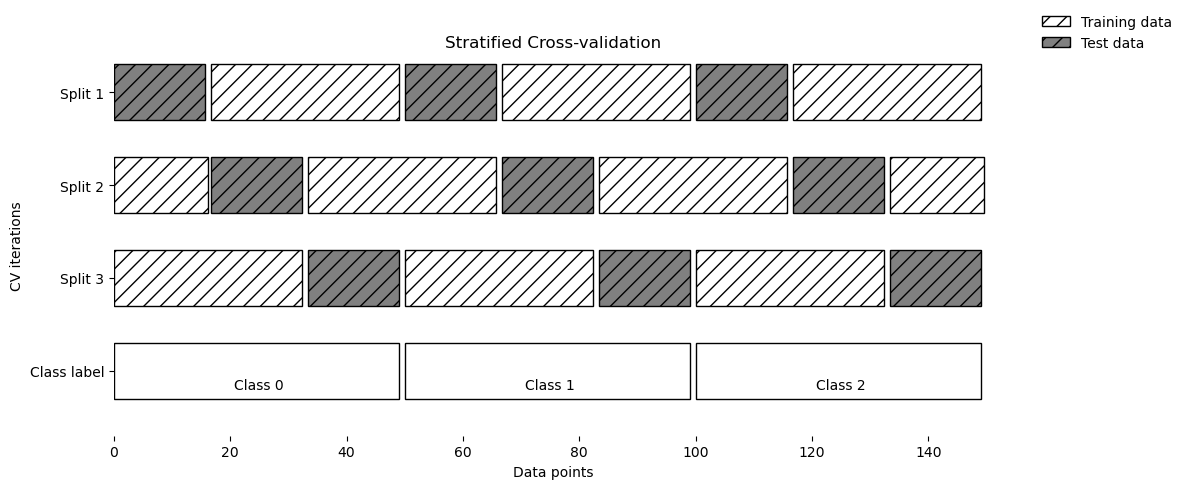

In [83]:
fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
ax = both_axes
ax.set_title("Stratified Cross-validation")
ax.set_frame_on(False)
ax.invert_yaxis()
ax.set_xlim(0, n_samples + 1)
ax.set_ylabel("CV iterations")
ax.set_xlabel("Data points")

ax.set_yticks(np.arange(n_folds + 1) + 0.3)
ax.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])

n_subsplit = n_samples_per_fold / 3.0
print("n_folds: ", n_folds)  # 3
print("n_samples_per_fold: ", n_samples_per_fold)  # 50
print("n_subsplit: ", n_subsplit)  # 16.666666666666668
for i in range(n_folds):
    print("y=[i] * n_folds", [i] * n_folds)
    print("width=[n_subsplit - 1] * n_folds", [n_subsplit - 1] * n_folds)
    print(
        "left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit",
        np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
    )
    test_bars = ax.barh(
        y=[i] * n_folds,
        width=[n_subsplit - 1] * n_folds,
        left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
        height=0.6,
        color="grey",
        hatch="//",
        edgecolor="k",
        align="edge",
    )

w = 2 * n_subsplit - 1
ax.barh(
    y=[0] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold + (0 + 1) * n_subsplit,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
ax.barh(
    y=[1] * (n_folds + 1),
    width=[w / 2.0, w, w, w / 2.0],
    left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold - n_subsplit),
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
training_bars = ax.barh(
    y=[2] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)

ax.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

for i in range(3):
    ax.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )
ax.set_ylim(4, -0.1)
plt.legend(
    [training_bars[0], test_bars[0]],
    ["Training data", "Test data"],
    loc=(1.05, 1),
    frameon=False,
)

fig.tight_layout()

In [84]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [85]:
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [86]:
kfold = KFold(n_splits=3)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0. 0. 0.]


In [87]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [88]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [89]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Number of cv iterations:  150
Mean accuracy: 0.97


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


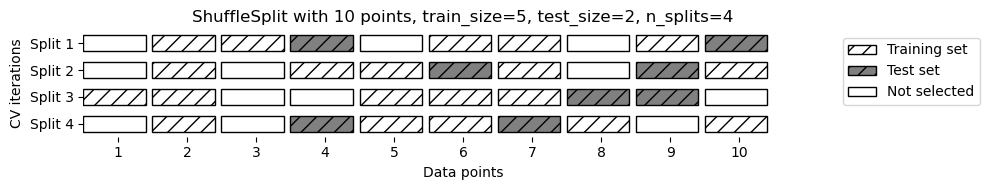

In [90]:
mglearn.plots.plot_shuffle_split()

In [91]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores:
[0.97333333 0.96       0.96       0.98666667 0.98666667 0.97333333
 0.97333333 0.98666667 0.93333333 0.94666667]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


In [93]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
print(
    "Size of training set: {} size of test set: {}".format(
        X_train.shape[0], X_test.shape[0]
    )
)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [94]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1
)
print(
    "Size of training set: {} size of validation set: {} size of test set:"
    " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])
)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

Size of training set: 84 size of validation set: 28 size of test set: 38



In [95]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [96]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [97]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [101]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [102]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [103]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [104]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.head())
type(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000682,0.000116,0.000161,0.000034,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000620,0.000009,0.000142,0.000001,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000648,0.000024,0.000156,0.000019,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000603,0.000015,0.000135,0.000004,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000586,0.000013,0.000132,0.000002,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


dict

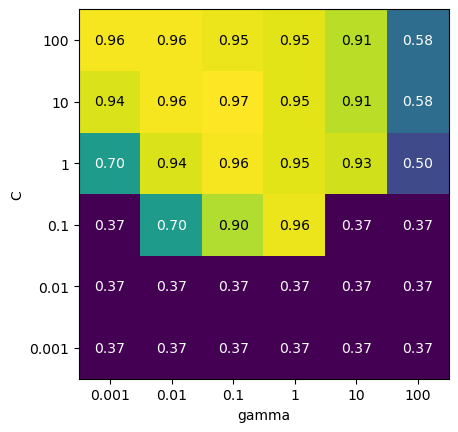

In [105]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(
    scores,
    xlabel="gamma",
    xticklabels=param_grid["gamma"],
    ylabel="C",
    yticklabels=param_grid["C"],
    cmap="viridis",
)

(6, 6)

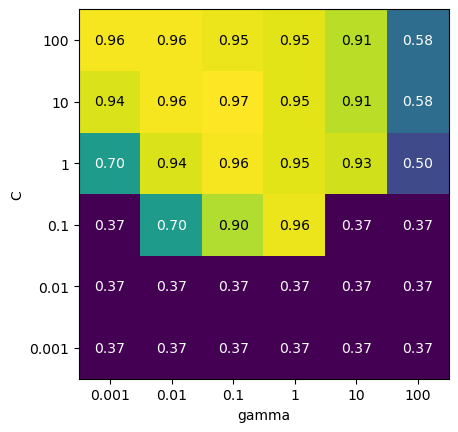

In [106]:
xlabel = "gamma"
ylabel = "C"
xticklabels = param_grid["gamma"]
yticklabels = param_grid["C"]
cmap = "viridis"
ax = plt.gca()
# plot the mean cross-validation scores
img = ax.pcolor(scores, cmap=cmap)
img.update_scalarmappable()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_aspect(1)
for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
    x, y = p.vertices[:-2, :].mean(0)
    if np.mean(color[:3]) > 0.5:
        c = "k"
    else:
        c = "w"
    ax.text(x, y, "%0.2f" % value, color=c, ha="center", va="center")
scores.shape

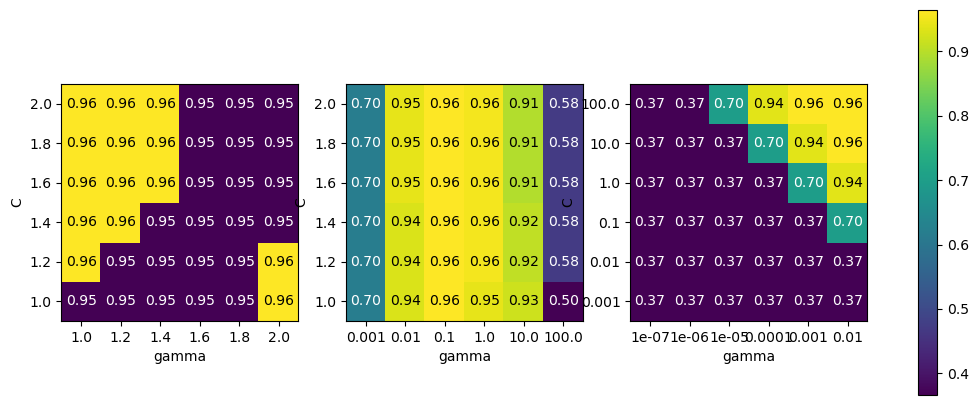

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {"C": np.linspace(1, 2, 6), "gamma": np.linspace(1, 2, 6)}
param_grid_one_log = {"C": np.linspace(1, 2, 6), "gamma": np.logspace(-3, 2, 6)}
param_grid_range = {"C": np.logspace(-3, 2, 6), "gamma": np.logspace(-7, -2, 6)}
for param_grid, ax in zip(
    [param_grid_linear, param_grid_one_log, param_grid_range], axes
):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_["mean_test_score"].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel="gamma",
        ylabel="C",
        xticklabels=param_grid["gamma"],
        yticklabels=param_grid["C"],
        cmap="viridis",
        ax=ax,
    )
plt.colorbar(scores_image, ax=axes.tolist())

In [108]:
param_grid = [
    {
        "kernel": ["rbf"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    },
    {"kernel": ["linear"], "C": [0.001, 0.01, 0.1, 1, 10, 100]},
]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [109]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [110]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000723,0.000617,0.000624,0.000624,0.000617,0.000592,0.000611,0.000608,0.000651,0.000625,...,0.000173,0.000307,0.00075,0.000707,0.000215,0.00017,0.000134,0.000131,0.000129,0.000129
std_fit_time,0.000142,0.000008,0.000006,0.000009,0.000007,0.000008,0.000009,0.000008,0.000011,0.000008,...,0.000007,0.000012,0.000065,0.000026,0.00002,0.000001,0.000001,0.000009,0.000005,0.000013
mean_score_time,0.000241,0.000143,0.000143,0.00014,0.000139,0.000139,0.000138,0.000136,0.000159,0.000142,...,0.000079,0.000092,0.000148,0.000151,0.000095,0.000082,0.000076,0.000077,0.00007,0.000072
std_score_time,0.000171,0.000001,0.000001,0.000001,0.000002,0.000002,0.000001,0.000001,0.000017,0.000001,...,0.000002,0.000001,0.000018,0.000009,0.000013,0.000001,0.000002,0.000008,0.000002,0.000003
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [111]:
scores = cross_val_score(
    GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5
)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [112]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]
            ):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                # compute mean score over inner folds
                mean_score = np.mean(cv_scores)
                if mean_score > best_score:
                    # if better than so far, remember parameters
                    best_score = mean_score
                    best_params = parameters
                    # build classifier on best parameters using outer training set
                    clf = Classifier(**best_params)
                    clf.fit(X[training_samples], y[training_samples])
                    # evaluate
                    outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [113]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(
    iris.data,
    iris.target,
    StratifiedKFold(5),
    StratifiedKFold(5),
    SVC,
    ParameterGrid(param_grid),
)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.86666667 0.86666667 0.86666667 0.86666667 0.9        0.96666667
 0.96666667 0.96666667 0.96666667 0.93333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.9        0.96666667 0.96666667 0.96666667
 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333]


In [114]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [115]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [116]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [117]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


(0.0, 1.0)

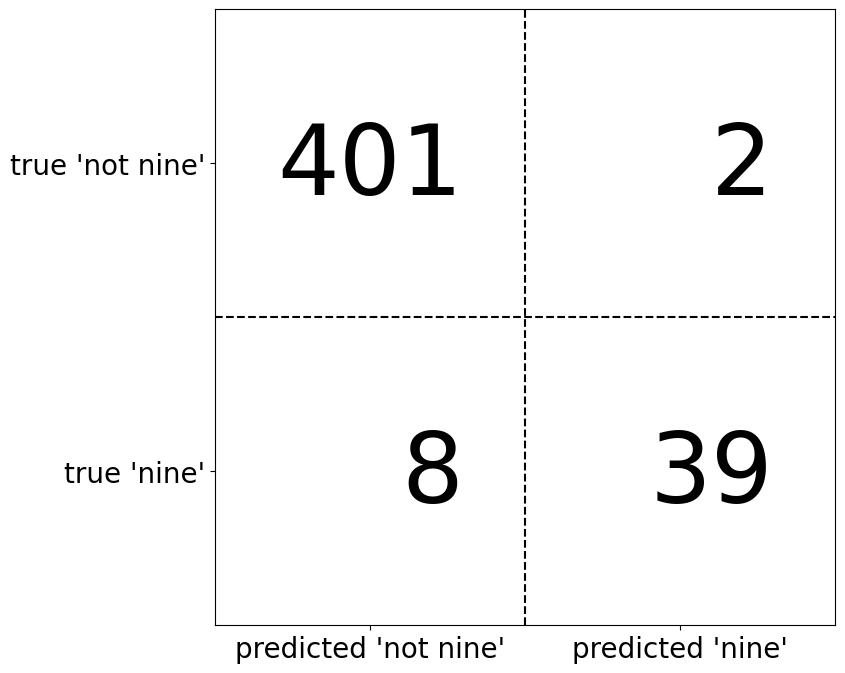

In [119]:
plt.figure(figsize=(8, 8))
confusion = np.array([[401, 2], [8, 39]])
plt.text(0.40, 0.7, confusion[0, 0], size=70, horizontalalignment="right")
plt.text(0.40, 0.2, confusion[1, 0], size=70, horizontalalignment="right")
plt.text(0.90, 0.7, confusion[0, 1], size=70, horizontalalignment="right")
plt.text(0.90, 0.2, confusion[1, 1], size=70, horizontalalignment="right")
plt.xticks([0.25, 0.75], ["predicted 'not nine'", "predicted 'nine'"], size=20)
plt.yticks([0.25, 0.75], ["true 'nine'", "true 'not nine'"], size=20)
plt.plot([0.5, 0.5], [0, 1], "--", c="k")
plt.plot([0, 1], [0.5, 0.5], "--", c="k")

plt.xlim(0, 1)
plt.ylim(0, 1)

Entries on the main diagonal3 of the confusion matrix correspond to correct classifications, while other entries tell us how many samples of one class got mistakenly classified as another class.

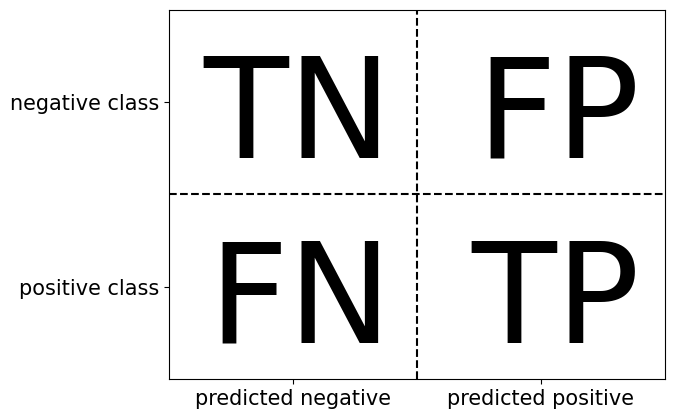

In [120]:
mglearn.plots.plot_binary_confusion_matrix()

In [121]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


In [122]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [123]:
from sklearn.metrics import classification_report

print(
    classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"])
)

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [124]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [125]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [126]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

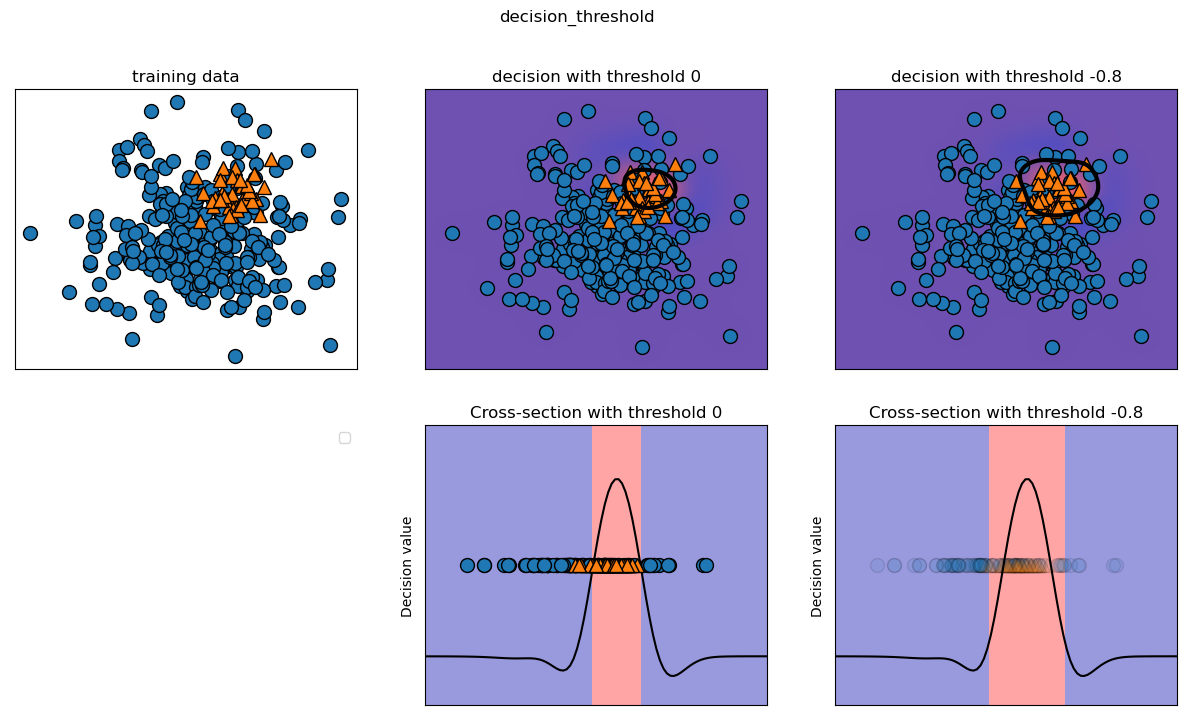

In [127]:
mglearn.plots.plot_decision_threshold()

In [128]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)
svc.decision_function(X_test)

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

(array([[  0.08349292,   9.43420252],
        [ 13.36699642,  -9.59885551],
        [ -3.28185749,   7.1893701 ],
        ...,
        [ -5.93996353,  -3.14475725],
        [-13.28428182,  -1.68248192],
        [-12.2017067 , -13.85595093]]),
 (4500, 2),
 array([1, 0, 1, ..., 0, 0, 0]))

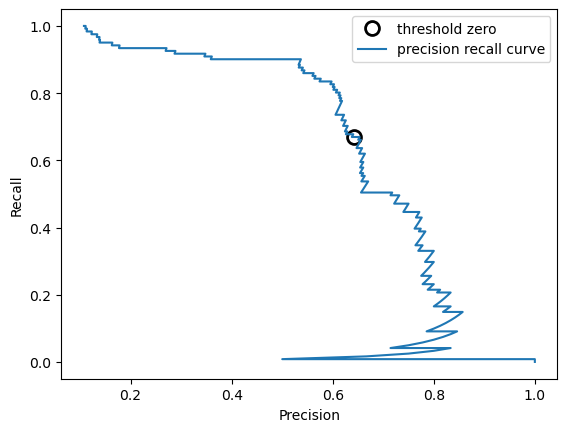

In [129]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    precision[close_zero],
    recall[close_zero],
    "o",
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c="k",
    mew=2,
)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
X, X.shape, y

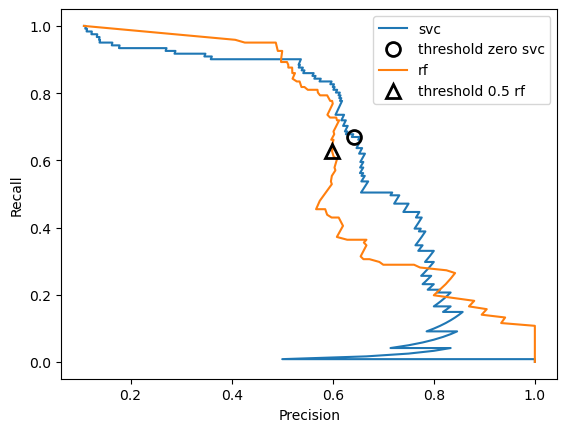

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="svc")
plt.plot(
    precision[close_zero],
    recall[close_zero],
    "o",
    markersize=10,
    label="threshold zero svc",
    fillstyle="none",
    c="k",
    mew=2,
)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(
    precision_rf[close_default_rf],
    recall_rf[close_default_rf],
    "^",
    c="k",
    markersize=10,
    label="threshold 0.5 rf",
    fillstyle="none",
    mew=2,
)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [131]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [132]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


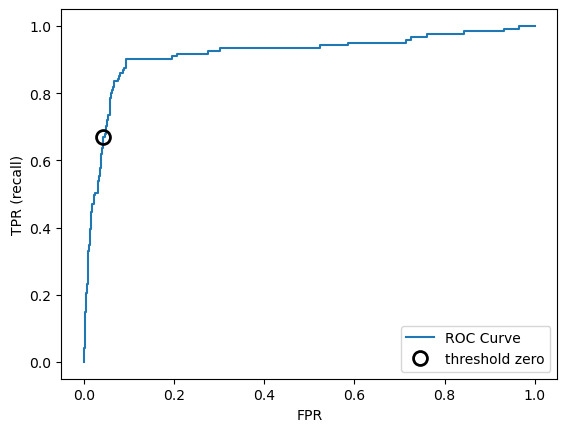

In [133]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    fpr[close_zero],
    tpr[close_zero],
    "o",
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c="k",
    mew=2,
)
plt.legend(loc=4)

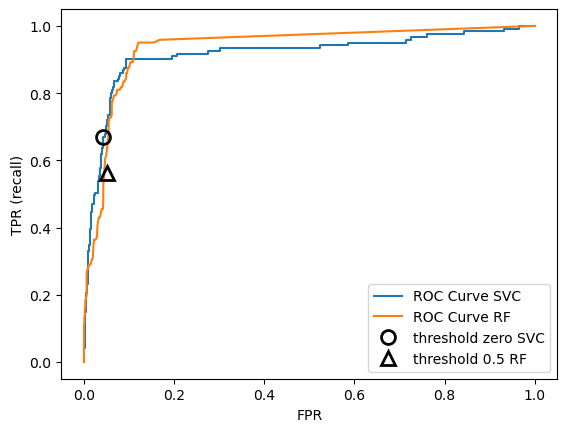

In [134]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(
    fpr[close_zero],
    tpr[close_zero],
    "o",
    markersize=10,
    label="threshold zero SVC",
    fillstyle="none",
    c="k",
    mew=2,
)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(
    fpr_rf[close_default_rf],
    tpr[close_default_rf],
    "^",
    markersize=10,
    label="threshold 0.5 RF",
    fillstyle="none",
    c="k",
    mew=2,
)
plt.legend(loc=4)

In [135]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


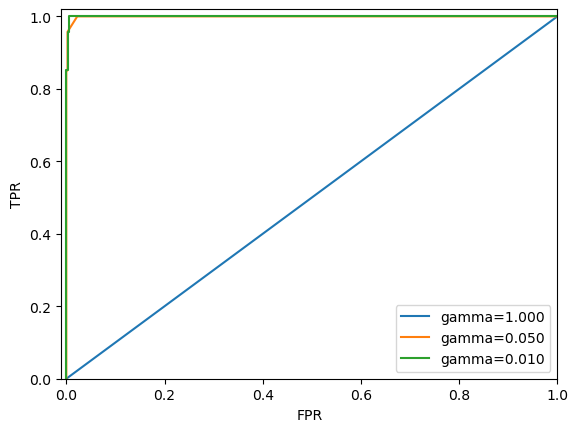

In [136]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [137]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0
)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
digits.data.shape

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1797, 64)

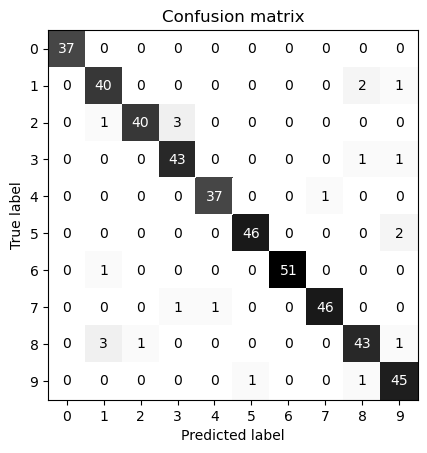

In [138]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred),
    xlabel="Predicted label",
    ylabel="True label",
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
    cmap=plt.cm.gray_r,
    fmt="%d",
)
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

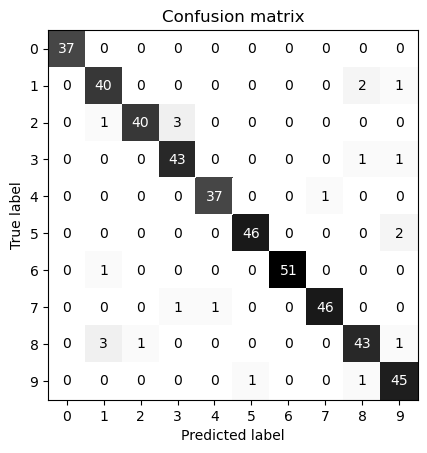

In [139]:
ax = plt.gca()
img = ax.pcolor(confusion_matrix(y_test, pred), cmap=plt.cm.gray_r)
img.update_scalarmappable()
xlabel = "Predicted label"
ylabel = "True label"
xticklabels = digits.target_names
yticklabels = digits.target_names
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_aspect(1)

for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
    x, y = p.vertices[:-2, :].mean(0)
    c = "k" if np.mean(color[:3]) > 0.5 else "w"
    ax.text(x, y, "%d" % value, color=c, ha="center", va="center")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [140]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [141]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [142]:
# default scoring for classification is accuracy
print(
    "Default scoring: {}".format(
        cross_val_score(SVC(), digits.data, digits.target == 9)
    )
)
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(
    SVC(), digits.data, digits.target == 9, scoring="accuracy"
)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0
)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {"gamma": [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print(
    "Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test)))
)
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [144]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print(
    "Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test)))
)
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [145]:
from sklearn.metrics import get_scorer_names

print("Available scorers:\n{}".format(sorted(get_scorer_names())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted',